In [7]:
import pandas as pd
import summary
from IPython.display import display, HTML

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)

variables_df = pd.read_excel("./external/PAKDD2010_VariablesList.XLS")
column_names = variables_df['Var_Title'].head(53).tolist()

data_df = pd.read_csv("./external/PAKDD2010_Leaderboard_Data.txt", sep='\t', header=None)

# mergeamos cabeceras con datos
data_df.columns = column_names

# mostrar primeras 10
display(HTML(data_df.head(10).to_html(index=False)))
print(data_df)


/var/folders/dy/14cf3ckd3sd77shr1nhwb41w0000gn/T/ipykernel_1761/748645955.py:11: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv("./external/PAKDD2010_Leaderboard_Data.txt", sep='\t', header=None)


ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,PROFESSIONAL_STATE,PROFESSIONAL_CITY,PROFESSIONAL_BOROUGH,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,EDUCATION_LEVEL,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3
50001,C,1,Web,0,1,F,1,0,4,SP,Osasco,1,SP,Osasco,Cidade das Flores,Y,5,1.0,3.0,N,0,1537.50,0.0,0,1,0,0,0,0,0,0,0,Y,,NaN,NaN,Y,5,0,9,2.0,NaN,NaN,0,0,0,0,1,Y,48,618,618
50002,C,20,Web,0,1,F,1,0,4,SP,SAO PAULO,a1,SP,Sao Paulo,Jardim Fernandes,Y,5,1.0,4.0,N,0,400.00,0.0,0,0,0,0,0,0,0,0,0,N,,NaN,NaN,N,,0,9,5.0,NaN,NaN,0,0,0,0,1,N,29,358,358
50003,C,25,Web,0,1,M,1,0,2,PA,BELEM,1,PA,ANANINDEUA,DISTRITO INDUSTRIAL,Y,117,1.0,12.0,N,0,300.00,0.0,0,0,0,0,0,0,0,0,0,N,,NaN,NaN,N,,0,9,4.0,NaN,NaN,0,0,0,0,1,N,53,670,670
50004,C,10,Web,0,1,F,7,0,3,RN,sao jose de mipibu,1,RN,SAO JOSE DE MIPIBU,BAIRRO NOVO,Y,105,1.0,NaN,Y,0,460.00,0.0,0,0,0,0,0,0,0,0,0,N,,NaN,NaN,N,,0,9,5.0,NaN,NaN,0,0,0,0,1,N,38,591,591
50005,C,25,Web,0,1,F,1,0,4,SP,SAO PAULO,1,SP,Sao Paulo,Guaianazes,Y,5,1.0,4.0,N,0,400.00,0.0,0,0,0,0,0,0,0,0,0,N,,NaN,NaN,Y,5,0,9,4.0,NaN,NaN,0,0,0,0,2,N,19,844,844
50006,C,10,Web,0,1,M,1,0,2,PA,CAMETA,1,PA,TUCURUI,PALMARES,Y,120,1.0,2.0,N,0,415.00,0.0,0,0,0,0,0,0,0,0,0,N,,NaN,NaN,N,,0,9,2.0,NaN,NaN,0,0,0,0,1,N,24,684,684
50007,C,25,Carga,0,1,M,2,0,3,SP,VARZEA PAULISTA,1,SP,VARZEA PAULISTA,JD DAS PALMEIRAS,Y,5,1.0,1.0,N,0,784.00,0.0,0,0,0,0,0,0,0,0,0,Y,SP,SAO PAULO,MORUMBI,N,,0,9,3.0,11.0,NaN,0,0,0,0,2,N,59,132,132
50008,C,25,Web,0,1,M,1,0,4,MA,CHAPADINHA,1,PI,TERESINA,AREIAS,Y,110,1.0,12.0,Y,0,500.00,0.0,1,1,0,0,0,0,0,0,0,Y,PI,TERESINA,CENTRO,Y,110,0,9,NaN,NaN,NaN,0,0,0,0,1,Y,28,640,640
50009,C,25,Web,0,1,F,2,1,4,SP,Sao Paulo,1,SP,Itaquaquecetuba,Jardim Carolina,Y,5,1.0,8.0,Y,0,762.15,0.0,0,0,0,0,0,0,0,0,0,N,,NaN,NaN,N,,0,9,2.0,NaN,NaN,0,0,0,0,1,N,27,858,858
50010,C,10,Web,0,1,F,6,1,3,MS,ANTONIO JOAO,1,MS,JARDIM,CENTRO,Y,75,1.0,8.0,N,0,350.00,0.0,0,0,0,0,0,0,0,0,0,Y,,NaN,NaN,N,,0,2,4.0,NaN,NaN,0,0,0,0,1,N,25,792,792


       ID_CLIENT CLERK_TYPE  PAYMENT_DAY APPLICATION_SUBMISSION_TYPE  QUANT_ADDITIONAL_CARDS  POSTAL_ADDRESS_TYPE SEX  MARITAL_STATUS  QUANT_DEPENDANTS  EDUCATION_LEVEL STATE_OF_BIRTH         CITY_OF_BIRTH NACIONALITY RESIDENCIAL_STATE    RESIDENCIAL_CITY  RESIDENCIAL_BOROUGH FLAG_RESIDENCIAL_PHONE RESIDENCIAL_PHONE_AREA_CODE  RESIDENCE_TYPE  MONTHS_IN_RESIDENCE FLAG_MOBILE_PHONE  FLAG_EMAIL  PERSONAL_MONTHLY_INCOME  OTHER_INCOMES  FLAG_VISA  FLAG_MASTERCARD  FLAG_DINERS  FLAG_AMERICAN_EXPRESS  FLAG_OTHER_CARDS  QUANT_BANKING_ACCOUNTS  QUANT_SPECIAL_BANKING_ACCOUNTS  PERSONAL_ASSETS_VALUE  QUANT_CARS COMPANY PROFESSIONAL_STATE PROFESSIONAL_CITY PROFESSIONAL_BOROUGH FLAG_PROFESSIONAL_PHONE PROFESSIONAL_PHONE_AREA_CODE  MONTHS_IN_THE_JOB  PROFESSION_CODE  OCCUPATION_TYPE  MATE_PROFESSION_CODE  EDUCATION_LEVEL  FLAG_HOME_ADDRESS_DOCUMENT  FLAG_RG  FLAG_CPF  FLAG_INCOME_PROOF  PRODUCT FLAG_ACSP_RECORD  AGE RESIDENCIAL_ZIP_3 PROFESSIONAL_ZIP_3
0          50001          C            1       

Anánlisis de datos



In [2]:

print(data_df.shape)
print(data_df.dtypes)



(20000, 53)
ID_CLIENT                           int64
CLERK_TYPE                         object
PAYMENT_DAY                         int64
APPLICATION_SUBMISSION_TYPE        object
QUANT_ADDITIONAL_CARDS              int64
POSTAL_ADDRESS_TYPE                 int64
SEX                                object
MARITAL_STATUS                      int64
QUANT_DEPENDANTS                    int64
EDUCATION_LEVEL                     int64
STATE_OF_BIRTH                     object
CITY_OF_BIRTH                      object
NACIONALITY                        object
RESIDENCIAL_STATE                  object
RESIDENCIAL_CITY                   object
RESIDENCIAL_BOROUGH                object
FLAG_RESIDENCIAL_PHONE             object
RESIDENCIAL_PHONE_AREA_CODE        object
RESIDENCE_TYPE                    float64
MONTHS_IN_RESIDENCE               float64
FLAG_MOBILE_PHONE                  object
FLAG_EMAIL                          int64
PERSONAL_MONTHLY_INCOME           float64
OTHER_INCOMES         

Análisis de nulos


In [3]:
print(data_df.isnull().sum())

ID_CLIENT                             0
CLERK_TYPE                            0
PAYMENT_DAY                           0
APPLICATION_SUBMISSION_TYPE           0
QUANT_ADDITIONAL_CARDS                0
POSTAL_ADDRESS_TYPE                   0
SEX                                   0
MARITAL_STATUS                        0
QUANT_DEPENDANTS                      0
EDUCATION_LEVEL                       0
STATE_OF_BIRTH                        0
CITY_OF_BIRTH                        10
NACIONALITY                           0
RESIDENCIAL_STATE                     1
RESIDENCIAL_CITY                      1
RESIDENCIAL_BOROUGH                   1
FLAG_RESIDENCIAL_PHONE                0
RESIDENCIAL_PHONE_AREA_CODE           0
RESIDENCE_TYPE                      616
MONTHS_IN_RESIDENCE                2663
FLAG_MOBILE_PHONE                     0
FLAG_EMAIL                            0
PERSONAL_MONTHLY_INCOME               0
OTHER_INCOMES                         0
FLAG_VISA                             0



Podríamos descartar estos 4 por la cantidad de nulos:

MATE_PROFESSION_CODE              18729
EDUCATION_LEVEL                   19539
PROFESSIONAL_CITY                 14206
PROFESSIONAL_BOROUGH              14206

Tenemos que establecer una estrategia para los que tienen pocos nulos:

CITY_OF_BIRTH                        10
RESIDENCIAL_STATE                     1
RESIDENCIAL_CITY                      1
RESIDENCIAL_BOROUGH                   1
RESIDENCE_TYPE                      616
MONTHS_IN_RESIDENCE                2663
OCCUPATION_TYPE                    2437


mediana para las numéricas  ?
más frecuente para las categóricas ?

Revisar variables categóricas:





In [5]:
print(data_df['columna_categ'].value_counts())


KeyError: 'columna_categ'

limpiar error de tipeo

In [ ]:
df['columna'] = df['columna'].str.lower().str.strip()


Codificación de variables categóricas para modelos lineares

In [ ]:
from sklearn.preprocessing import OneHotEncoder
df = pd.get_dummies(df, columns=['columna_categ'])


para árboles

In [ ]:
df['columna_categ'] = df['columna_categ'].astype('category').cat.codes


DETECTAR OUTLIERS

REEMPLAZAR POR PERCENTILES ?

NORMALIZACÓN Y ESCALADO.

=== Información general ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_CLIENT                       20000 non-null  int64  
 1   CLERK_TYPE                      20000 non-null  object 
 2   PAYMENT_DAY                     20000 non-null  int64  
 3   APPLICATION_SUBMISSION_TYPE     20000 non-null  object 
 4   QUANT_ADDITIONAL_CARDS          20000 non-null  int64  
 5   POSTAL_ADDRESS_TYPE             20000 non-null  int64  
 6   SEX                             20000 non-null  object 
 7   MARITAL_STATUS                  20000 non-null  int64  
 8   QUANT_DEPENDANTS                20000 non-null  int64  
 9   EDUCATION_LEVEL                 20000 non-null  int64  
 10  STATE_OF_BIRTH                  20000 non-null  object 
 11  CITY_OF_BIRTH                   19990 non-null  object 
 12  NACI

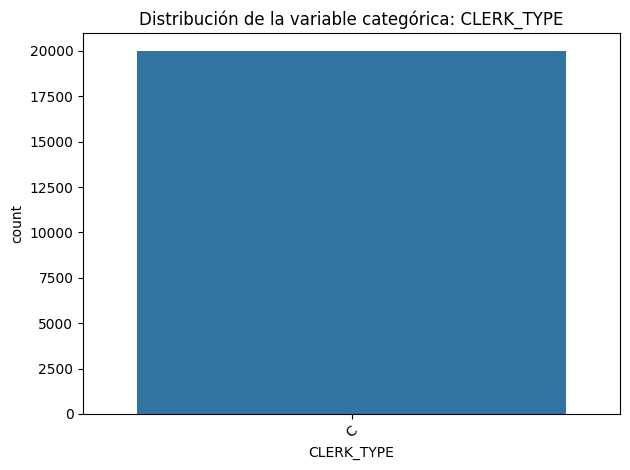

❌ 'CLERK_TYPE' tiene un solo valor único. Se puede eliminar del análisis.

Columna: APPLICATION_SUBMISSION_TYPE
APPLICATION_SUBMISSION_TYPE
Web      19366
Carga      634
Name: count, dtype: int64


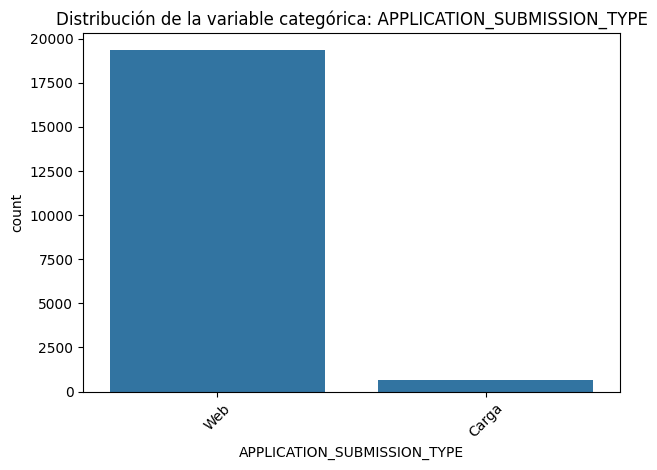

✅ 'APPLICATION_SUBMISSION_TYPE' es categórica útil. Se recomienda codificación (Label/One-Hot).

Columna: SEX
SEX
F    11670
M     8330
Name: count, dtype: int64


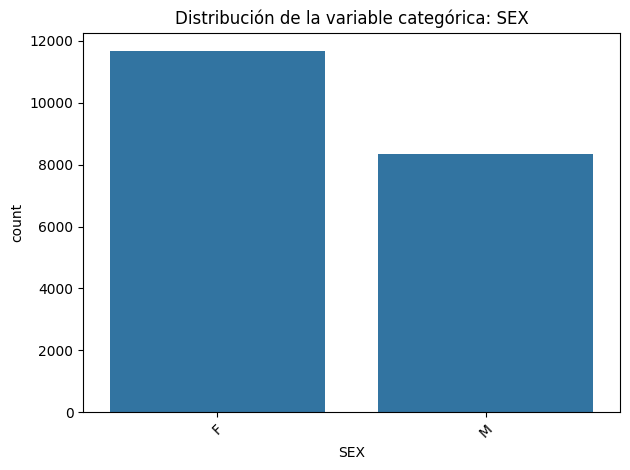

✅ 'SEX' es categórica útil. Se recomienda codificación (Label/One-Hot).

Columna: STATE_OF_BIRTH
STATE_OF_BIRTH
SP    2606
BA    2282
RS    1963
PE    1882
MG    1466
CE    1355
RN     994
RJ     890
PR     831
PA     785
PB     719
MA     710
AL     623
GO     512
SC     387
PI     342
MT     294
ES     223
MS     222
AM     187
DF     164
SE     159
AC     102
RO     101
TO      75
AP      74
RR      40
        10
XX       2
Name: count, dtype: int64


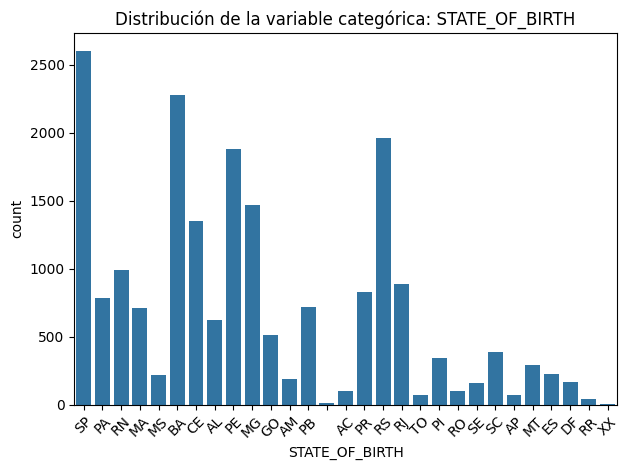

✅ 'STATE_OF_BIRTH' es categórica útil. Se recomienda codificación (Label/One-Hot).

Columna: CITY_OF_BIRTH
CITY_OF_BIRTH
RIO DE JANEIRO          548
SAO PAULO               421
RECIFE                  397
SALVADOR                263
FORTALEZA               252
                       ... 
Mutuipe                   1
AMAPORA                   1
OBIDOS                    1
CAIANA                    1
Salinas da Margarida      1
Name: count, Length: 5709, dtype: int64


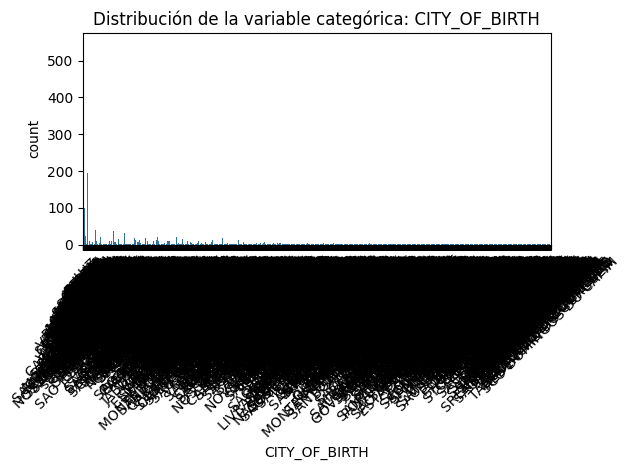

✅ 'CITY_OF_BIRTH' es categórica útil. Se recomienda codificación (Label/One-Hot).

Columna: NACIONALITY
NACIONALITY
1     16337
1      3603
2        38
2        11
0         8
0         2
a1        1
Name: count, dtype: int64


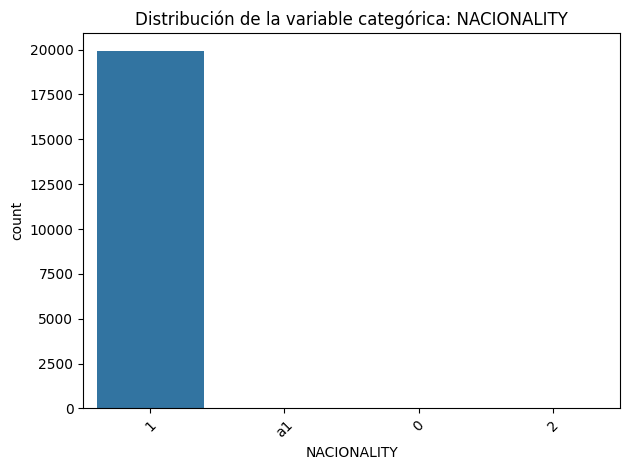

✅ 'NACIONALITY' es categórica útil. Se recomienda codificación (Label/One-Hot).

Columna: RESIDENCIAL_STATE
RESIDENCIAL_STATE
SP     3735
RS     1960
BA     1902
PE     1641
MG     1178
CE     1176
RN      995
RJ      911
PA      877
GO      740
PB      580
PR      576
MT      515
AL      487
SC      459
MA      436
DF      350
MS      230
ES      212
RO      206
AM      201
PI      161
AP      120
SE      120
AC      105
RR       65
TO       61
NaN       1
Name: count, dtype: int64


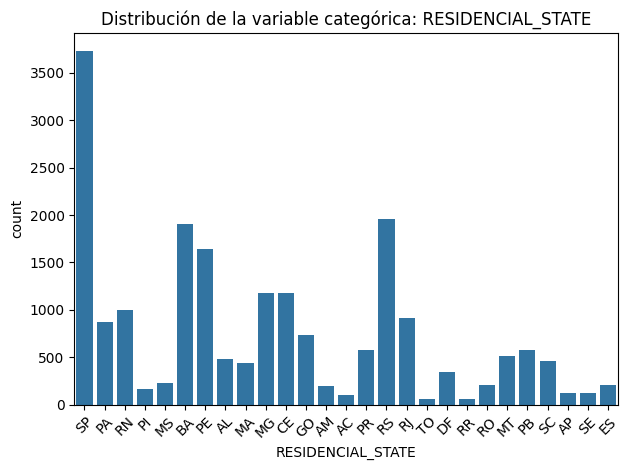

✅ 'RESIDENCIAL_STATE' es categórica útil. Se recomienda codificación (Label/One-Hot).

Columna: RESIDENCIAL_CITY
RESIDENCIAL_CITY
Sao Paulo          594
Guarulhos          315
Recife             258
Natal              247
SALVADOR           221
                  ... 
GUERAREMA            1
tailandia            1
TUCURuI              1
NOVA PARNAMIRIM      1
HHORIZONTE           1
Name: count, Length: 2541, dtype: int64


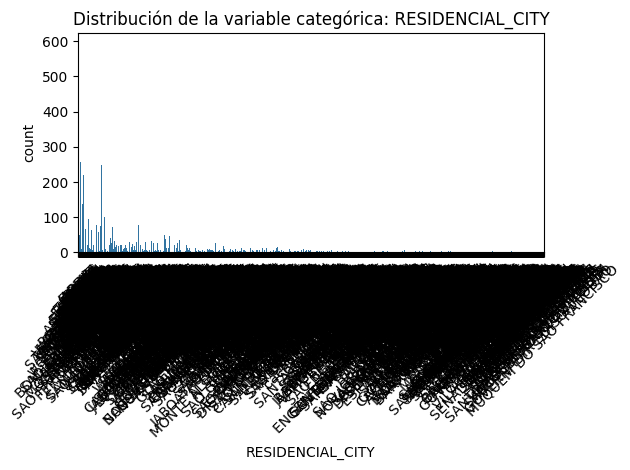

✅ 'RESIDENCIAL_CITY' es categórica útil. Se recomienda codificación (Label/One-Hot).

Columna: RESIDENCIAL_BOROUGH
RESIDENCIAL_BOROUGH
CENTRO             1543
Centro              240
centro              196
ZONA RURAL          129
COHAB                77
                   ... 
Vila Pauline          1
Vila Emir             1
Parque Saxonia        1
VIADUTO               1
Jardim Cristino       1
Name: count, Length: 8144, dtype: int64


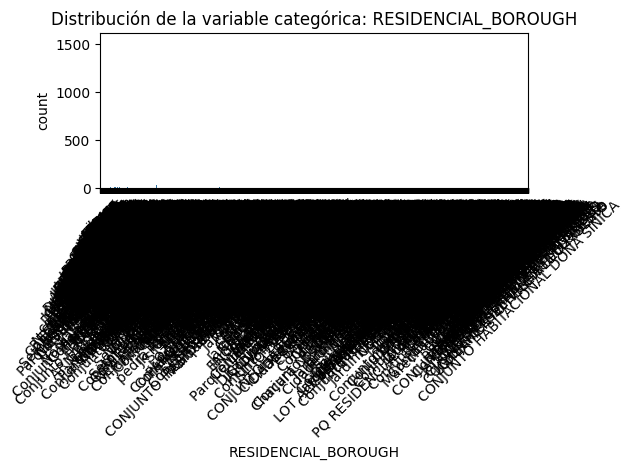

✅ 'RESIDENCIAL_BOROUGH' es categórica útil. Se recomienda codificación (Label/One-Hot).

Columna: FLAG_RESIDENCIAL_PHONE
FLAG_RESIDENCIAL_PHONE
Y    17732
N     2268
Name: count, dtype: int64


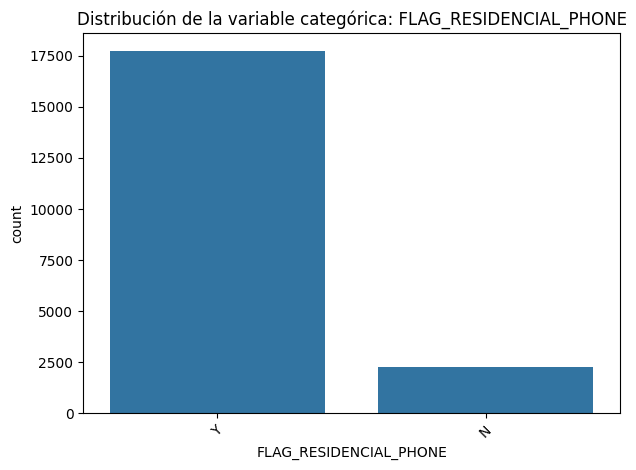

✅ 'FLAG_RESIDENCIAL_PHONE' es categórica útil. Se recomienda codificación (Label/One-Hot).

Columna: RESIDENCIAL_PHONE_AREA_CODE
RESIDENCIAL_PHONE_AREA_CODE
       2268
5      2050
97     1307
54      935
105     876
       ... 
129       1
28        1
130       1
98        1
128       1
Name: count, Length: 78, dtype: int64


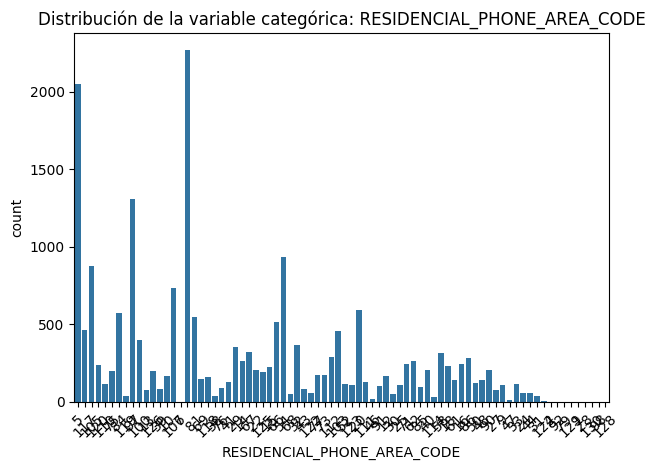

✅ 'RESIDENCIAL_PHONE_AREA_CODE' es categórica útil. Se recomienda codificación (Label/One-Hot).

Columna: FLAG_MOBILE_PHONE
FLAG_MOBILE_PHONE
N    11955
Y     8045
Name: count, dtype: int64


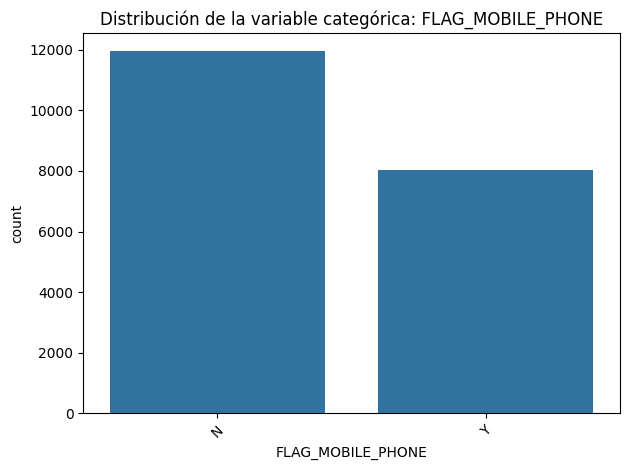

✅ 'FLAG_MOBILE_PHONE' es categórica útil. Se recomienda codificación (Label/One-Hot).

Columna: COMPANY
COMPANY
N    12381
Y     7619
Name: count, dtype: int64


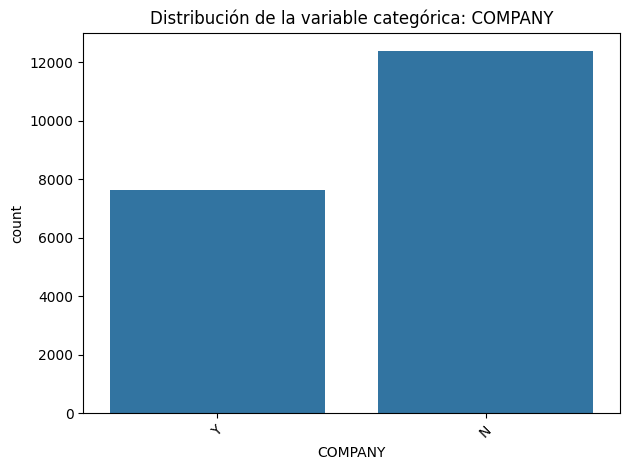

✅ 'COMPANY' es categórica útil. Se recomienda codificación (Label/One-Hot).

Columna: PROFESSIONAL_STATE
PROFESSIONAL_STATE
      14287
SP      965
RS      722
BA      571
MG      404
CE      363
PE      323
PR      239
MT      225
RJ      219
RN      207
SC      206
PA      200
GO      153
DF      136
MS      106
PB      101
RO       96
AL       95
MA       75
ES       75
SE       49
AP       43
AM       42
AC       36
PI       29
RR       21
TO       12
Name: count, dtype: int64


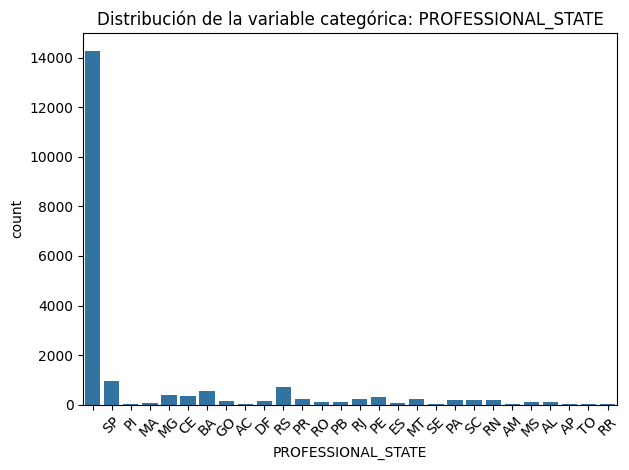

✅ 'PROFESSIONAL_STATE' es categórica útil. Se recomienda codificación (Label/One-Hot).

Columna: PROFESSIONAL_CITY
PROFESSIONAL_CITY
NaN                        14206
SAO PAULO                    136
Sao Paulo                    127
Porto Alegre                  96
SALVADOR                      87
                           ...  
Sao Joao de Meriti             1
SANTA LUZIA                    1
BNRASILIA                      1
DISTRITO DE OURO BRANCO        1
SANTO AMARI                    1
Name: count, Length: 1438, dtype: int64


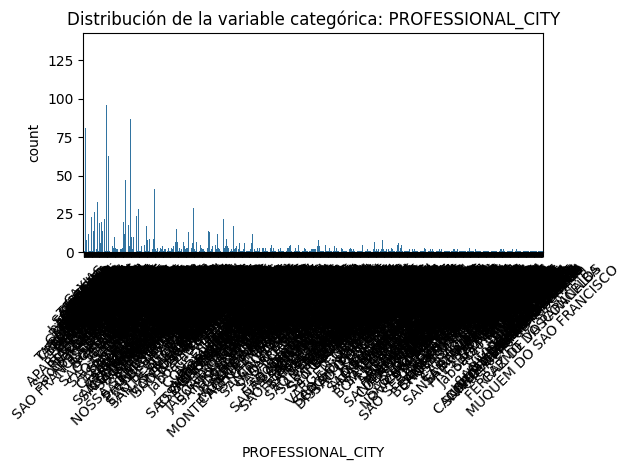

✅ 'PROFESSIONAL_CITY' es categórica útil. Se recomienda codificación (Label/One-Hot).

Columna: PROFESSIONAL_BOROUGH
PROFESSIONAL_BOROUGH
NaN                   14206
CENTRO                 1173
                        290
Centro                  172
centro                  162
                      ...  
VILA MARIZA MAZZEI        1
aeroporto III             1
HELIOPOLIS                1
XX XC                     1
PARQUE DO LAGO            1
Name: count, Length: 2541, dtype: int64


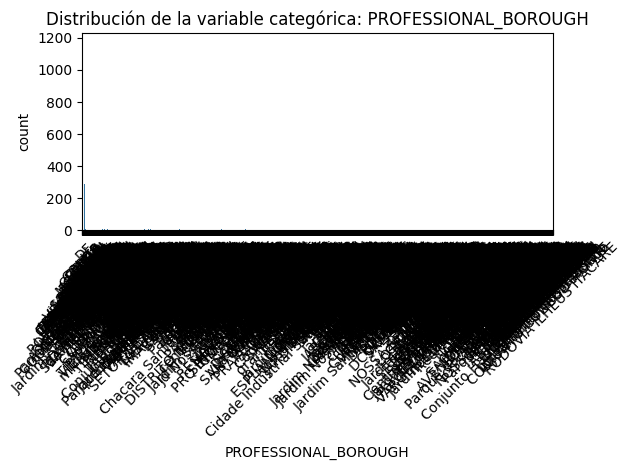

✅ 'PROFESSIONAL_BOROUGH' es categórica útil. Se recomienda codificación (Label/One-Hot).

Columna: FLAG_PROFESSIONAL_PHONE
FLAG_PROFESSIONAL_PHONE
N    14549
Y     5451
Name: count, dtype: int64


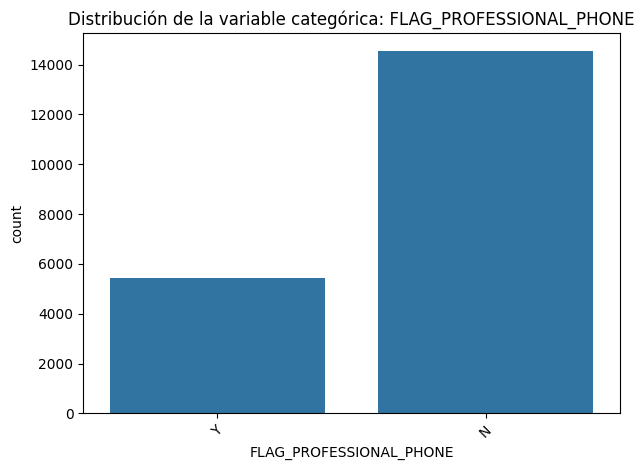

✅ 'FLAG_PROFESSIONAL_PHONE' es categórica útil. Se recomienda codificación (Label/One-Hot).

Columna: PROFESSIONAL_PHONE_AREA_CODE
PROFESSIONAL_PHONE_AREA_CODE
       14553
5        598
54       447
97       270
107      254
       ...  
132        1
28         1
53         1
4          1
131        1
Name: count, Length: 77, dtype: int64


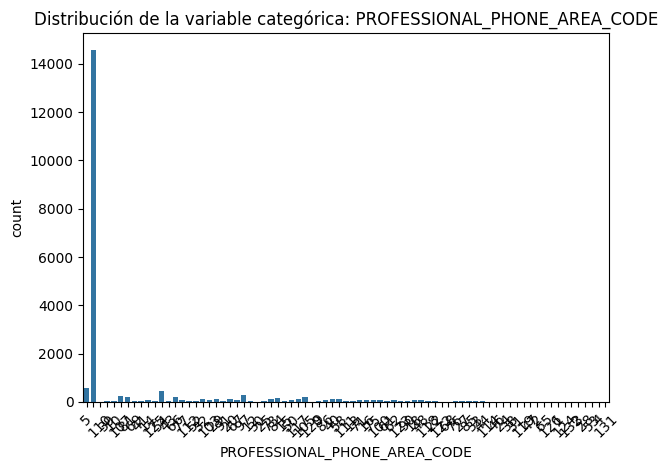

✅ 'PROFESSIONAL_PHONE_AREA_CODE' es categórica útil. Se recomienda codificación (Label/One-Hot).

Columna: FLAG_ACSP_RECORD
FLAG_ACSP_RECORD
N    16546
Y     3454
Name: count, dtype: int64


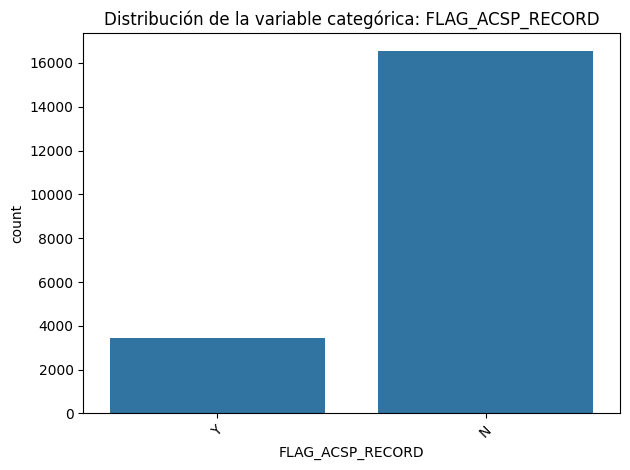

✅ 'FLAG_ACSP_RECORD' es categórica útil. Se recomienda codificación (Label/One-Hot).

Columna: RESIDENCIAL_ZIP_3
RESIDENCIAL_ZIP_3
591    389
570    254
456    237
581    226
590    223
      ... 
241      1
390      1
344      1
860      1
449      1
Name: count, Length: 754, dtype: int64


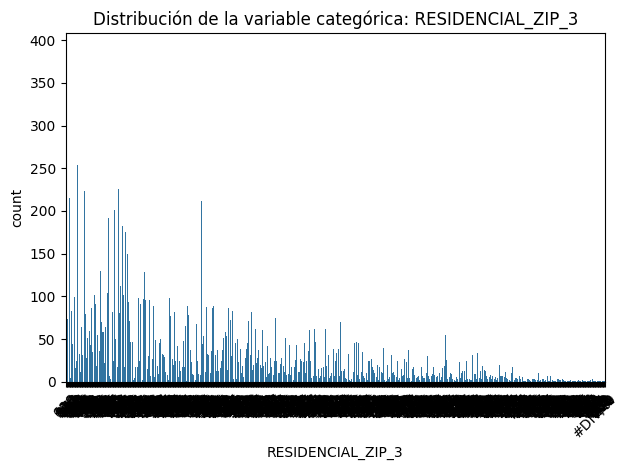

✅ 'RESIDENCIAL_ZIP_3' es categórica útil. Se recomienda codificación (Label/One-Hot).

Columna: PROFESSIONAL_ZIP_3
PROFESSIONAL_ZIP_3
591    389
570    254
456    237
581    226
590    223
      ... 
241      1
390      1
344      1
860      1
449      1
Name: count, Length: 754, dtype: int64


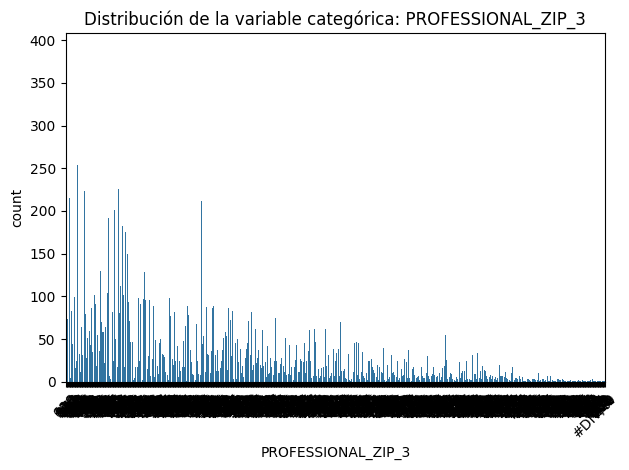

✅ 'PROFESSIONAL_ZIP_3' es categórica útil. Se recomienda codificación (Label/One-Hot).

=== Análisis de variables numéricas ===

Columna: ID_CLIENT
count    20000.000000
mean     60000.500000
std       5773.647028
min      50001.000000
25%      55000.750000
50%      60000.500000
75%      65000.250000
max      70000.000000
Name: ID_CLIENT, dtype: float64


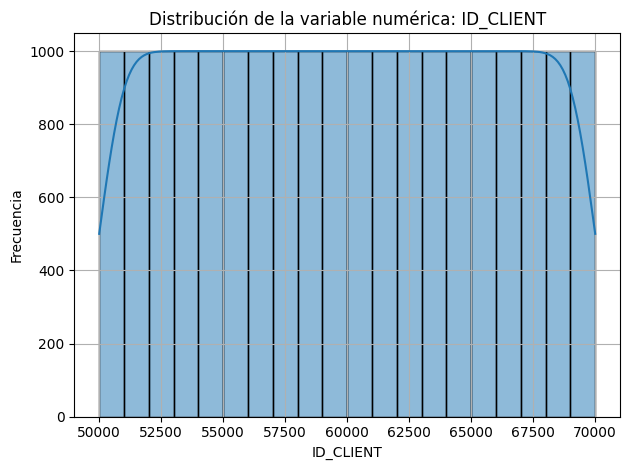

✅ 'ID_CLIENT' no tiene valores nulos. Lista para usar en modelos.

Columna: PAYMENT_DAY
count    20000.00000
mean        13.28630
std          6.91053
min          1.00000
25%         10.00000
50%         10.00000
75%         20.00000
max         25.00000
Name: PAYMENT_DAY, dtype: float64


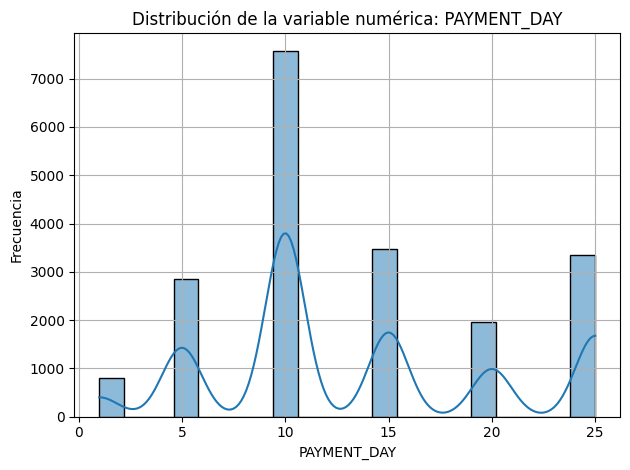

✅ 'PAYMENT_DAY' no tiene valores nulos. Lista para usar en modelos.

Columna: QUANT_ADDITIONAL_CARDS
count    20000.000000
mean         0.066200
std          0.251437
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: QUANT_ADDITIONAL_CARDS, dtype: float64


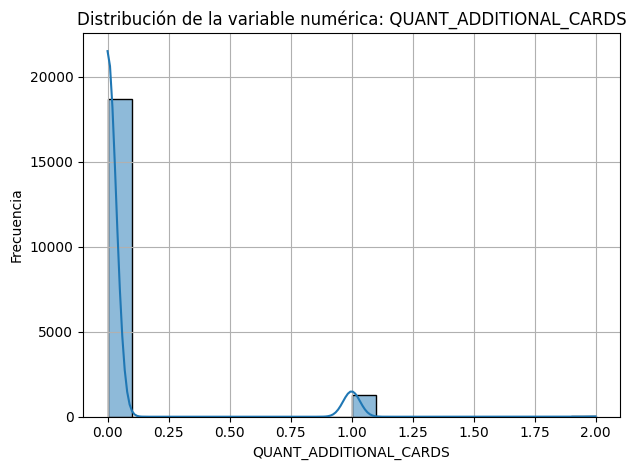

✅ 'QUANT_ADDITIONAL_CARDS' no tiene valores nulos. Lista para usar en modelos.

Columna: POSTAL_ADDRESS_TYPE
count    20000.000000
mean         1.008900
std          0.093921
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: POSTAL_ADDRESS_TYPE, dtype: float64


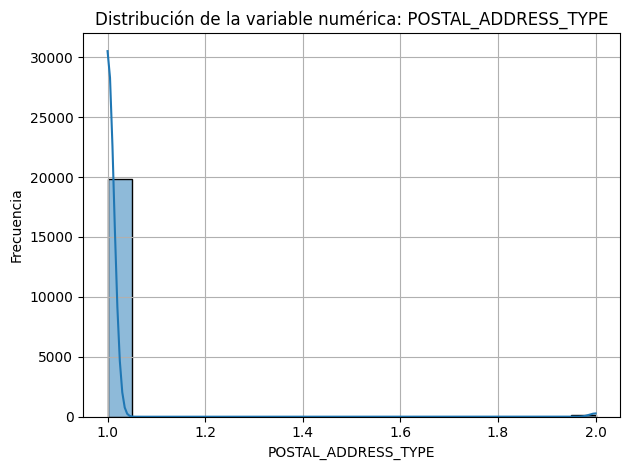

✅ 'POSTAL_ADDRESS_TYPE' no tiene valores nulos. Lista para usar en modelos.

Columna: MARITAL_STATUS
count    20000.000000
mean         2.028000
std          1.356174
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          7.000000
Name: MARITAL_STATUS, dtype: float64


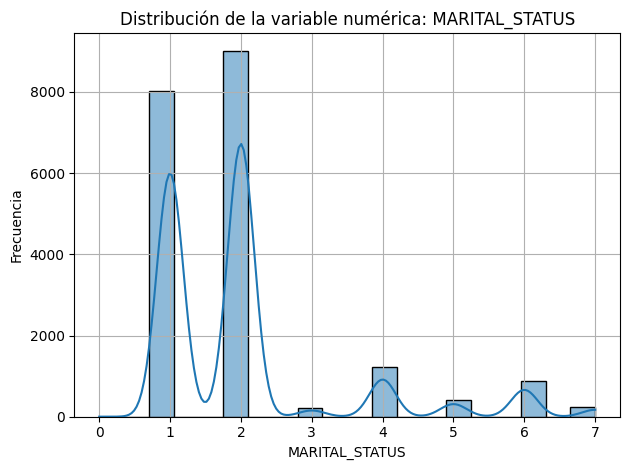

✅ 'MARITAL_STATUS' no tiene valores nulos. Lista para usar en modelos.

Columna: QUANT_DEPENDANTS
count    20000.000000
mean         0.584750
std          1.124536
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         25.000000
Name: QUANT_DEPENDANTS, dtype: float64


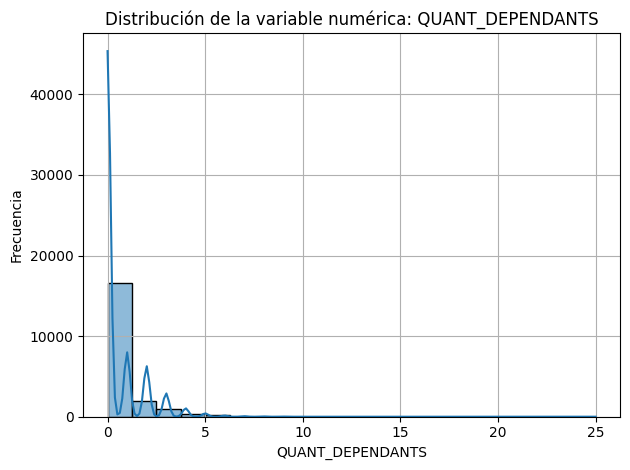

✅ 'QUANT_DEPENDANTS' no tiene valores nulos. Lista para usar en modelos.

Columna: EDUCATION_LEVEL
       EDUCATION_LEVEL  EDUCATION_LEVEL
count      20000.00000        461.00000
mean           3.07990          3.02603
std            0.92734          1.00400
min            1.00000          0.00000
25%            2.00000          2.00000
50%            3.00000          3.00000
75%            4.00000          4.00000
max            5.00000          5.00000


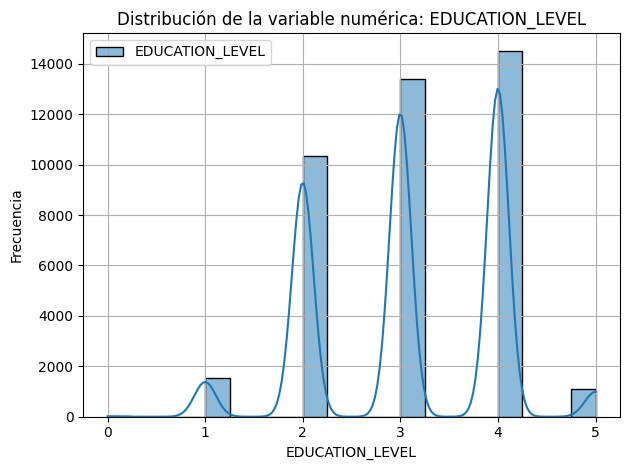

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [15]:
# Exploratory Data Analysis para `data_df`

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Información general del DataFrame
print("=== Información general ===")
print(data_df.info())

# 2. Estadísticas descriptivas para variables numéricas
print("\n=== Estadísticas descriptivas (numéricas) ===")
print(data_df.describe())

# 3. Conteo de valores nulos por columna
print("\n=== Valores nulos por columna ===")
print(data_df.isnull().sum())

# 4. Variables categóricas y análisis
cat_cols = data_df.select_dtypes(include=['object']).columns
print("\n=== Análisis de variables categóricas ===")
for col in cat_cols:
    print(f"\nColumna: {col}")
    print(data_df[col].value_counts(dropna=False))
    sns.countplot(data=data_df, x=col)
    plt.title(f'Distribución de la variable categórica: {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Acción sugerida
    if data_df[col].nunique() == 1:
        print(f"\u274C '{col}' tiene un solo valor único. Se puede eliminar del análisis.")
    else:
        print(f"\u2705 '{col}' es categórica útil. Se recomienda codificación (Label/One-Hot).")

# 5. Variables numéricas y su distribución
num_cols = data_df.select_dtypes(include=['int64', 'float64']).columns
print("\n=== Análisis de variables numéricas ===")
for col in num_cols:
    print(f"\nColumna: {col}")
    print(data_df[col].describe())
    sns.histplot(data_df[col], kde=True, bins=20)
    plt.title(f'Distribución de la variable numérica: {col}')
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    if data_df[col].isnull().sum() > 0:
        print(f"\u26A0 '{col}' tiene valores nulos. Considerar imputación (media/mediana) o eliminación.")
    else:
        print(f"\u2705 '{col}' no tiene valores nulos. Lista para usar en modelos.")

# 6. Matriz de correlación para variables numéricas
print("\n=== Matriz de correlación ===")
plt.figure(figsize=(10, 6))
sns.heatmap(data_df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de correlación entre variables numéricas")
plt.tight_layout()
plt.show()

# Fin del EDA
print("\n=== Fin del Análisis Exploratorio ===")


=== Análisis de variables numéricas ===

--- Análisis para la columna: ID_CLIENT ---
count    20000.000000
mean     60000.500000
std       5773.647028
min      50001.000000
25%      55000.750000
50%      60000.500000
75%      65000.250000
max      70000.000000
Name: ID_CLIENT, dtype: float64


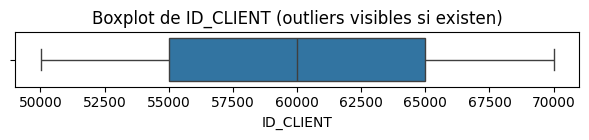

Outliers detectados (Z-score > 3): 0 (0.00% del total)
✅ 'ID_CLIENT' tiene pocos outliers. Puede mantenerse sin cambios o tratarse mínimamente.
⚖ 'ID_CLIENT' tiene rango amplio. Se recomienda escalar (MinMaxScaler o StandardScaler).

--- Análisis para la columna: PAYMENT_DAY ---
count    20000.00000
mean        13.28630
std          6.91053
min          1.00000
25%         10.00000
50%         10.00000
75%         20.00000
max         25.00000
Name: PAYMENT_DAY, dtype: float64


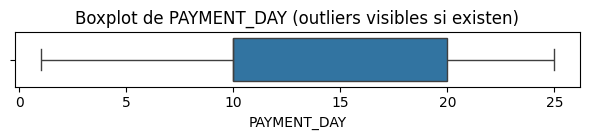

Outliers detectados (Z-score > 3): 0 (0.00% del total)
✅ 'PAYMENT_DAY' tiene pocos outliers. Puede mantenerse sin cambios o tratarse mínimamente.
✅ 'PAYMENT_DAY' tiene rango moderado. Escalado puede ser opcional.

--- Análisis para la columna: QUANT_ADDITIONAL_CARDS ---
count    20000.000000
mean         0.066200
std          0.251437
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: QUANT_ADDITIONAL_CARDS, dtype: float64


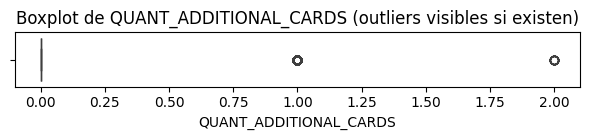

Outliers detectados (Z-score > 3): 1310 (6.55% del total)
⚠ 'QUANT_ADDITIONAL_CARDS' tiene muchos outliers. Considerar winsorización o transformación log.
✅ 'QUANT_ADDITIONAL_CARDS' tiene rango moderado. Escalado puede ser opcional.

--- Análisis para la columna: POSTAL_ADDRESS_TYPE ---
count    20000.000000
mean         1.008900
std          0.093921
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: POSTAL_ADDRESS_TYPE, dtype: float64


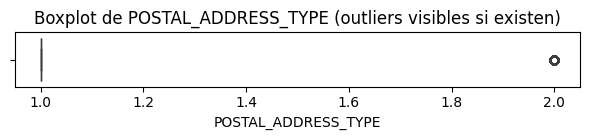

Outliers detectados (Z-score > 3): 178 (0.89% del total)
✅ 'POSTAL_ADDRESS_TYPE' tiene pocos outliers. Puede mantenerse sin cambios o tratarse mínimamente.
✅ 'POSTAL_ADDRESS_TYPE' tiene rango moderado. Escalado puede ser opcional.

--- Análisis para la columna: MARITAL_STATUS ---
count    20000.000000
mean         2.028000
std          1.356174
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          7.000000
Name: MARITAL_STATUS, dtype: float64


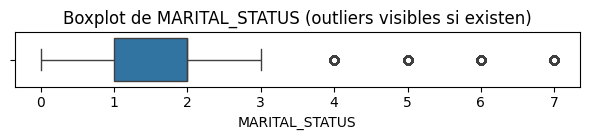

Outliers detectados (Z-score > 3): 229 (1.15% del total)
✅ 'MARITAL_STATUS' tiene pocos outliers. Puede mantenerse sin cambios o tratarse mínimamente.
✅ 'MARITAL_STATUS' tiene rango moderado. Escalado puede ser opcional.

--- Análisis para la columna: QUANT_DEPENDANTS ---
count    20000.000000
mean         0.584750
std          1.124536
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         25.000000
Name: QUANT_DEPENDANTS, dtype: float64


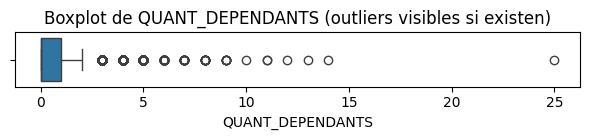

Outliers detectados (Z-score > 3): 542 (2.71% del total)
✅ 'QUANT_DEPENDANTS' tiene pocos outliers. Puede mantenerse sin cambios o tratarse mínimamente.
✅ 'QUANT_DEPENDANTS' tiene rango moderado. Escalado puede ser opcional.

--- Análisis para la columna: EDUCATION_LEVEL ---
       EDUCATION_LEVEL  EDUCATION_LEVEL
count      20000.00000        461.00000
mean           3.07990          3.02603
std            0.92734          1.00400
min            1.00000          0.00000
25%            2.00000          2.00000
50%            3.00000          3.00000
75%            4.00000          4.00000
max            5.00000          5.00000


ValueError: If using all scalar values, you must pass an index

<Figure size 600x150 with 0 Axes>

In [19]:
# Análisis de variables numéricas: outliers y normalización
# Análisis de variables numéricas: outliers y normalización
# Análisis de variables numéricas: outliers y normalización

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Filtrar solo columnas numéricas
num_cols = data_df.select_dtypes(include=['int64', 'float64']).columns

outlier_cols = []
scaling_cols = []

print("=== Análisis de variables numéricas ===")
for col in num_cols:
    print(f"\n--- Análisis para la columna: {col} ---")

    # Estadísticas básicas
    print(data_df[col].describe())

    # Gráfico boxplot para detectar outliers
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(data=data_df, x=col, orient='h')
    plt.title(f"Boxplot de {col} (outliers visibles si existen)")
    plt.tight_layout()
    plt.show()

    # Detectar outliers con Z-score
    col_zscore = stats.zscore(data_df[col].dropna())
    outliers = (abs(col_zscore) > 3).sum()
    total = data_df[col].dropna().shape[0]
    outlier_percent = (outliers / total) * 100
    print(f"Outliers detectados (Z-score > 3): {outliers} ({outlier_percent:.2f}% del total)")

    if outlier_percent > 5:
        print(f"\u26A0 '{col}' tiene muchos outliers. Considerar winsorización o transformación log.")
        outlier_cols.append(col)
    else:
        print(f"\u2705 '{col}' tiene pocos outliers. Puede mantenerse sin cambios o tratarse mínimamente.")

    # Decidir si se escala
    rango = data_df[col].max() - data_df[col].min()
    if rango > 100:
        print(f"\u2696 '{col}' tiene rango amplio. Se recomienda escalar (MinMaxScaler o StandardScaler).")
        scaling_cols.append(col)
    else:
        print(f"\u2705 '{col}' tiene rango moderado. Escalado puede ser opcional.")

print("=== Fin del análisis de variables numéricas ===")

# Agregar columnas que no fueron escaladas pero analizadas
for col in num_cols:
    if col not in scaling_cols:
        summary.append({
            'feature': col,
            'has_outliers': col in outlier_cols,
            'scaling_applied': False,
            'scaling_method': None
        })

eda_summary_df = pd.DataFrame(summary)
print("=== Resumen EDA por variable numérica ===")
print(eda_summary_df)

# Mostrar recomendaciones
print("\n=== Columnas con muchos outliers ===")
print(outlier_cols)

print("=== Columnas recomendadas para escalar ===")

# Preparar resumen del EDA
summary = []

# Sugerir tipo de escalado y aplicar transformación
for col in scaling_cols:
    col_data = data_df[col].dropna()
    if abs(col_data.skew()) > 1:
        print(f"\u27A1 '{col}': distribución sesgada, usar MinMaxScaler o transformación logarítmica.")
        scaler = MinMaxScaler()
    else:
        print(f"\u27A1 '{col}': distribución aproximadamente normal, usar StandardScaler.")
        scaler = StandardScaler()

    # Aplicar escalado (se guarda en nueva columna)
    scaled_values = scaler.fit_transform(data_df[[col]].fillna(0))  # se puede mejorar la imputación
    data_df[f'{col}_scaled'] = scaled_values
    summary.append({
        'feature': col,
        'has_outliers': col in outlier_cols,
        'scaling_applied': True,
        'scaling_method': 'MinMaxScaler' if abs(col_data.skew()) > 1 else 'StandardScaler'
    })

